Epoch 0, Loss: 0.9670284390449524, Accuracy: 0.5054166666666666
Epoch 10, Loss: 0.7296294569969177, Accuracy: 0.6364583333333333
Epoch 20, Loss: 0.6310625672340393, Accuracy: 0.6652083333333333
Epoch 30, Loss: 0.33748117089271545, Accuracy: 0.6933333333333334
Training is complete!


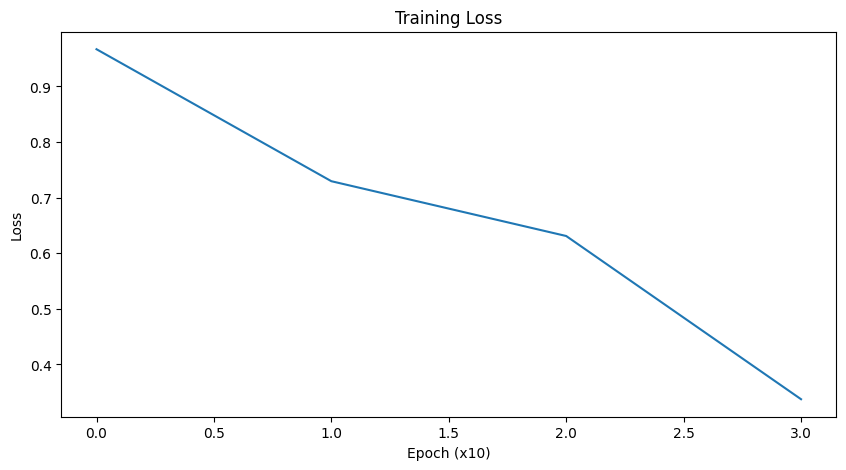

Accuracy of the network on test data: 51 %


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(100, 20)
        self.dropout1 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(20, 20)
        self.dropout2 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(20, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        self.dropout1(x)
        x = torch.relu(self.fc3(x))
        self.dropout2(x)
        x = self.fc4(x)
        return x

def binary_to_bits(binary_list):
    return [[[int(i) for i in str(bit)] for bit in binary_string][0] for binary_string in binary_list]

data = np.loadtxt("AI_2qubits_training_data.txt", dtype = str)
X = torch.tensor(np.array(binary_to_bits(data[:,:-1])))
Y = torch.tensor(data[:,-1].astype(int))-1

net = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.0005)  # Add L2 regularization here

dataset = TensorDataset(X.float(), Y.long())

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

def get_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

losses = []
accuracies = []

for epoch in range(40):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        train_acc = get_accuracy(train_loader, net)
        print(f"Epoch {epoch}, Loss: {loss.item()}, Accuracy: {train_acc}")
        losses.append(loss.item())
        accuracies.append(train_acc)

print("Training is complete!")

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch (x10)')
plt.ylabel('Loss')
plt.show()

net.eval()
test_acc = get_accuracy(test_loader, net)
print('Accuracy of the network on test data: %d %%' % (100 * test_acc))


Epoch 0, Loss: 1.1199370622634888, Accuracy: 0.529375
Epoch 10, Loss: 0.8308830261230469, Accuracy: 0.568125
Epoch 20, Loss: 0.7620842456817627, Accuracy: 0.5697916666666667
Epoch 30, Loss: 0.9773595929145813, Accuracy: 0.5689583333333333
Epoch 40, Loss: 1.198759913444519, Accuracy: 0.565
Epoch 50, Loss: 1.0454446077346802, Accuracy: 0.5683333333333334
Epoch 60, Loss: 0.862614631652832, Accuracy: 0.568125
Epoch 70, Loss: 0.6810250878334045, Accuracy: 0.56375
Epoch 80, Loss: 1.0372484922409058, Accuracy: 0.569375
Epoch 90, Loss: 1.3495291471481323, Accuracy: 0.5714583333333333
Training is complete!


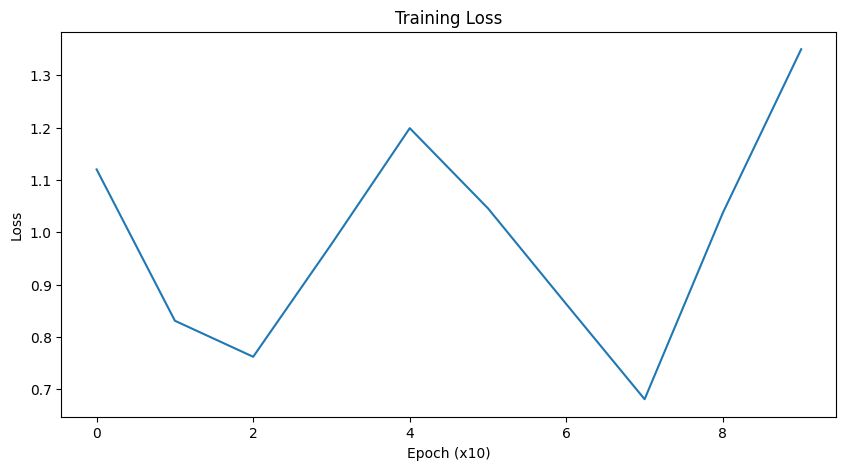

Accuracy of the network on test data: 54 %


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(0)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(100, 30)
        self.dropout1 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(30, 20)
        self.dropout2 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(20, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        self.dropout1(x)
        x = torch.relu(self.fc3(x))
        self.dropout2(x)
        x = self.fc4(x)
        return x

def binary_to_bits(binary_list):
    return [[[int(i) for i in str(bit)] for bit in binary_string][0] for binary_string in binary_list]
data = np.loadtxt("AI_2qubits_training_data.txt", dtype = str)
X = torch.tensor(np.array(binary_to_bits(data[:,:-1])))
Y = torch.tensor(data[:,-1].astype(int))-1

# Create the network
net = Net().to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Create a dataset from X and y
dataset = TensorDataset(X.float(), Y.long())

# Decide on the sizes of the splits
train_size = int(0.8 * len(dataset))  # 50% for training
test_size = len(dataset) - train_size  # 50% for testing

# Use random_split to split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for the train and test datasets
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Function to calculate accuracy
def get_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Lists to store losses and accuracies for plotting
losses = []
accuracies = []

# Train the network
for epoch in range(100):  # 500 epochs
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #Add regularization
        l1_norm = sum(p.abs().sum() for p in net.parameters())
        loss+=0.002*l1_norm
        loss.backward()
        optimizer.step()

    # Print loss and accuracy every 10 epochs
    if epoch % 10 == 0:
        train_acc = get_accuracy(train_loader, net)
        print(f"Epoch {epoch}, Loss: {loss.item()}, Accuracy: {train_acc}")
        losses.append(loss.item())
        accuracies.append(train_acc)

print("Training is complete!")

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch (x10)')
plt.ylabel('Loss')
plt.show()

# Test the network
net.eval()  # Set the network to evaluation mode
test_acc = get_accuracy(test_loader, net)
print('Accuracy of the network on test data: %d %%' % (100 * test_acc))


Epoch 0, Loss: 1.1199370622634888, Accuracy: 0.529375
Epoch 10, Loss: 0.8308830261230469, Accuracy: 0.568125
Epoch 20, Loss: 0.7620842456817627, Accuracy: 0.5697916666666667
Epoch 30, Loss: 0.9773595929145813, Accuracy: 0.5689583333333333
Epoch 40, Loss: 1.198759913444519, Accuracy: 0.565
Epoch 50, Loss: 1.0454446077346802, Accuracy: 0.5683333333333334
Epoch 60, Loss: 0.862614631652832, Accuracy: 0.568125
Epoch 70, Loss: 0.6810250878334045, Accuracy: 0.56375
Training is complete!


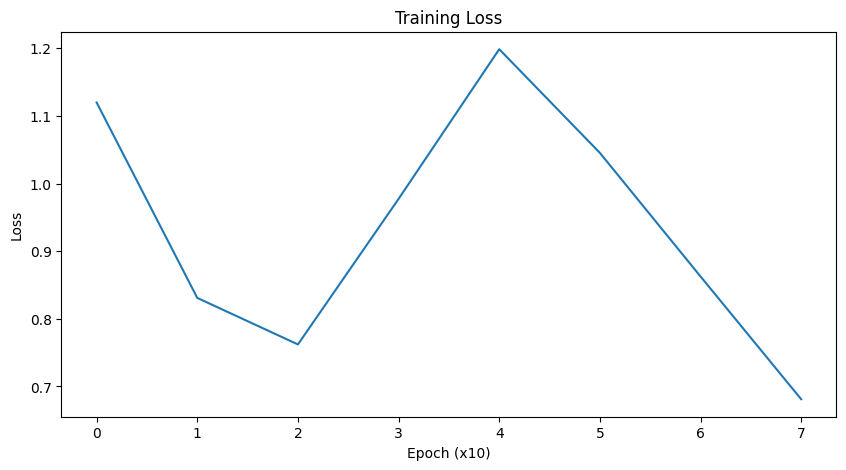

Accuracy of the network on test data: 54 %


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(0)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(100, 30)
        self.dropout1 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(30, 20)
        self.dropout2 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(20, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        self.dropout1(x)
        x = torch.relu(self.fc3(x))
        self.dropout2(x)
        x = self.fc4(x)
        return x

def binary_to_bits(binary_list):
    return [[[int(i) for i in str(bit)] for bit in binary_string][0] for binary_string in binary_list]
data = np.loadtxt("AI_2qubits_training_data.txt", dtype = str)
X = torch.tensor(np.array(binary_to_bits(data[:,:-1])))
Y = torch.tensor(data[:,-1].astype(int))-1

# Create the network
net = Net().to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Create a dataset from X and y
dataset = TensorDataset(X.float(), Y.long())

# Decide on the sizes of the splits
train_size = int(0.8 * len(dataset))  # 50% for training
test_size = len(dataset) - train_size  # 50% for testing

# Use random_split to split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for the train and test datasets
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Function to calculate accuracy
def get_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Lists to store losses and accuracies for plotting
losses = []
accuracies = []

# Train the network
for epoch in range(72):  # 500 epochs
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #Add regularization
        l1_norm = sum(p.abs().sum() for p in net.parameters())
        loss+=0.002*l1_norm
        loss.backward()
        optimizer.step()

    # Print loss and accuracy every 10 epochs
    if epoch % 10 == 0:
        train_acc = get_accuracy(train_loader, net)
        print(f"Epoch {epoch}, Loss: {loss.item()}, Accuracy: {train_acc}")
        losses.append(loss.item())
        accuracies.append(train_acc)

print("Training is complete!")

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch (x10)')
plt.ylabel('Loss')
plt.show()

# Test the network
net.eval()  # Set the network to evaluation mode
test_acc = get_accuracy(test_loader, net)
print('Accuracy of the network on test data: %d %%' % (100 * test_acc))


Epoch 0, Loss: 1.1797254085540771, Accuracy: 0.3422222222222222
Epoch 10, Loss: 1.1112927198410034, Accuracy: 0.5683333333333334
Epoch 20, Loss: 0.9477442502975464, Accuracy: 0.5916666666666667
Epoch 30, Loss: 1.1219295263290405, Accuracy: 0.6061111111111112
Epoch 40, Loss: 1.095760703086853, Accuracy: 0.6183333333333333
Epoch 50, Loss: 0.5893382430076599, Accuracy: 0.6238888888888889
Training is complete!


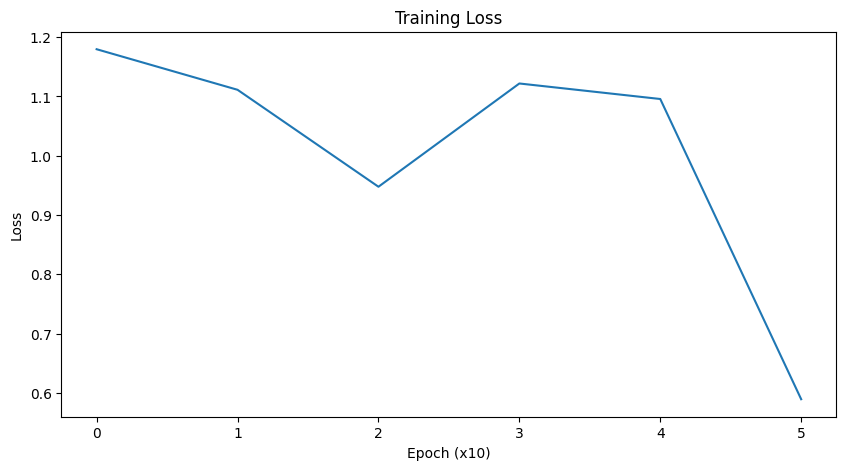

Accuracy of the network on test data: 53 %


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(100, 20)
        self.dropout1 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(20, 10)
        self.dropout2 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        self.dropout1(x)
        x = torch.relu(self.fc3(x))
        self.dropout2(x)
        x = self.fc4(x)
        return x

def binary_to_bits(binary_list):
    return [[[int(i) for i in str(bit)] for bit in binary_string][0] for binary_string in binary_list]
data = np.loadtxt("AI_2qubits_training_data.txt", dtype = str)
X = torch.tensor(np.array(binary_to_bits(data[:,:-1])))
Y = torch.tensor(data[:,-1].astype(int))-1

# Create the network
net = Net().to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Create a dataset from X and y
dataset = TensorDataset(X.float(), Y.long())

# Decide on the sizes of the splits
train_size = int(0.3 * len(dataset))  # 50% for training
test_size = len(dataset) - train_size  # 50% for testing

# Use random_split to split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for the train and test datasets
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Function to calculate accuracy
def get_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Lists to store losses and accuracies for plotting
losses = []
accuracies = []

# Train the network
for epoch in range(51):  # 500 epochs
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        #Add regularization
        l1_norm = sum(p.abs().sum() for p in net.parameters())
        loss+=0.001*l1_norm
        loss.backward()
        optimizer.step()

    # Print loss and accuracy every 10 epochs
    if epoch % 10 == 0:
        train_acc = get_accuracy(train_loader, net)
        print(f"Epoch {epoch}, Loss: {loss.item()}, Accuracy: {train_acc}")
        losses.append(loss.item())
        accuracies.append(train_acc)

print("Training is complete!")

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch (x10)')
plt.ylabel('Loss')
plt.show()

# Test the network
net.eval()  # Set the network to evaluation mode
test_acc = get_accuracy(test_loader, net)
print('Accuracy of the network on test data: %d %%' % (100 * test_acc))
#lambda = 0.001 gave 50%